In [1]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import torch

In [2]:
import sys
import os

# Get the parent directory of the notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

import utils  

In [3]:
# fashion mnist dataset

train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

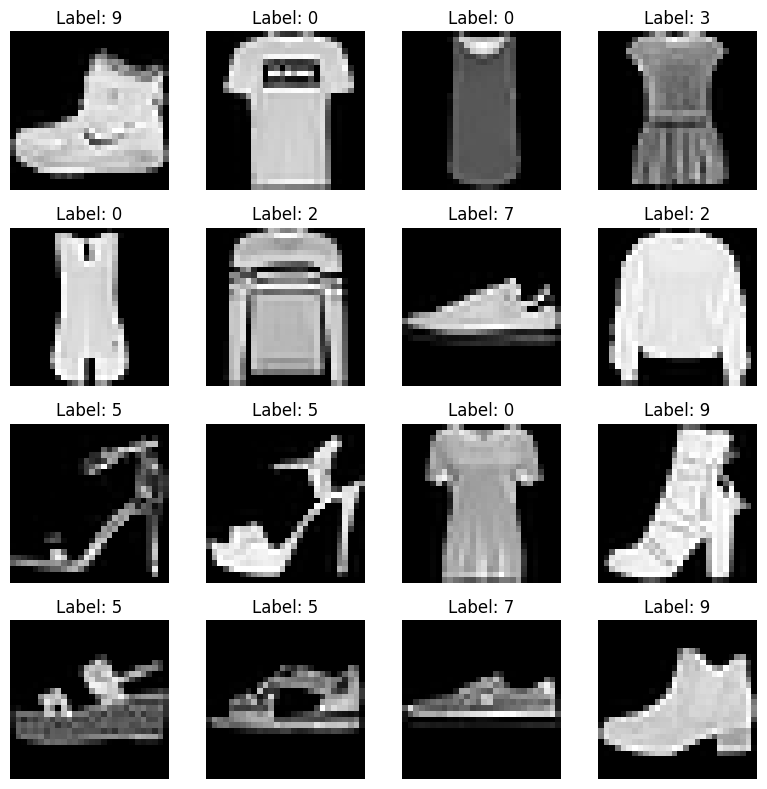

In [4]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
# Loop through each subplot and plot an image
for i in range(4):
    for j in range(4):
        image, label = train_dataset[i * 4 + j]  # Get image and label
        image_numpy = image.numpy().squeeze()    # Convert image tensor to numpy array
        axs[i, j].imshow(image_numpy, cmap='gray')  # Plot the image
        axs[i, j].axis('off')  # Turn off axis
        axs[i, j].set_title(f"Label: {label}")  # Set title with label

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [5]:
import torch.nn as nn

class SupervisedModel(nn.Module):
    def __init__(self):
        super(SupervisedModel, self).__init__()
        
        self.backbone = nn.Sequential(
                                nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
                                nn.ReLU(),
                                nn.BatchNorm2d(32),
                                nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
                                nn.ReLU(),
                                nn.BatchNorm2d(64),
                                nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
                                nn.ReLU(),
                                nn.BatchNorm2d(128),
        )
        
        self.fc = nn.Sequential(
                                nn.Linear(128*4*4, 32),
                                nn.ReLU(),
                                nn.Linear(32, 10),
        )
    
    def forward(self, x):
        x = self.backbone(x).view(-1, 128 * 4 * 4)
        
        return self.fc(x)

In [6]:
supervised_model = SupervisedModel()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(supervised_model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

num_epochs = 5

for epoch in range(num_epochs):
    supervised_model.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = supervised_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print(f'Epoch: {epoch}, Batch: {i + 1}, Loss: {loss.item()}')
            
    print(f'Epoch: {epoch}, Train Accuracy: {utils.get_accuracy(train_loader, supervised_model)}')
    print(f'Epoch: {epoch}, Test Accuracy: {utils.get_accuracy(test_loader, supervised_model)}')

Epoch: 0, Batch: 100, Loss: 0.7580798268318176
Epoch: 0, Batch: 200, Loss: 0.5232144594192505
Epoch: 0, Batch: 300, Loss: 0.7647923827171326
Epoch: 0, Batch: 400, Loss: 0.3396032154560089
Epoch: 0, Batch: 500, Loss: 0.3925679326057434
Epoch: 0, Batch: 600, Loss: 0.27633050084114075
Epoch: 0, Batch: 700, Loss: 0.23433923721313477
Epoch: 0, Batch: 800, Loss: 0.3711095452308655
Epoch: 0, Batch: 900, Loss: 0.29126229882240295
Epoch: 0, Batch: 1000, Loss: 0.3708222210407257
Epoch: 0, Batch: 1100, Loss: 0.45102253556251526
Epoch: 0, Batch: 1200, Loss: 0.28890568017959595
Epoch: 0, Batch: 1300, Loss: 0.23549197614192963
Epoch: 0, Batch: 1400, Loss: 0.38662880659103394
Epoch: 0, Batch: 1500, Loss: 0.37800097465515137
Epoch: 0, Batch: 1600, Loss: 0.30285701155662537
Epoch: 0, Batch: 1700, Loss: 0.4113065302371979
Epoch: 0, Batch: 1800, Loss: 0.2585434913635254
Epoch: 0, Train Accuracy: 0.9039666666666667
Epoch: 0, Test Accuracy: 0.8806
Epoch: 1, Batch: 100, Loss: 0.22415414452552795
Epoch: 1, B